# Field of View (FOV) and Resolution

The image we create is fundamentally defined by the field-of-view (FOV) and spatial resolution captured.  These are determined by our k-space sampling pattern.

## Learning Goals

1. Describe how images are formed
    * Describe what determines the image FOV and resolution
1. Manipulate MRI sequence parameters to improve performance
    * Manipulate the gradients and k-space sampling to change the FOV and resolution



In [ ]:
% setup MRI-education-resources path and requirements
cd ../
startup

loading image
loading signal


## Field-of-View (FOV)

The FOV is determined by the sample spacing in k-space, with the simple relationship based on the sample spacing, $\Delta k$ as:

$$ FOV = \frac{1}{\Delta k}$$

For example, $FOV_{x} = \frac{1}{\Delta k_x}$

In [ ]:
% rectangular object to demonstrate FOV

N = 256;
kx = [-N/2+1:N/2]/N;
N_rect = N/4;
kdata = sinc(kx *N_rect).' * sinc(kx *N_rect);

rect_recon = ifft2c(kdata);

subplot(221)
imagesc(log(abs(kdata)), [0 max(log(abs(kdata(:)))))
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon), [0 max(abs(rect_recon(:)))])
colormap(gray), axis equal tight off
title('Full FOV')

kdata2 = kdata;
kdata2(1:2:end,:) = 0;
kdata2(:,1:2:end) = 0;
rect_recon2 = ifft2c(kdata2);

figure
subplot(221)
imagesc(log(abs(kdata2)), [0 max(log(abs(kdata2(:))))])
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon2), [0 max(abs(rect_recon2(:)))])
colormap(gray), axis equal tight off
title('Doubled \Delta k, Half FOV')

kdata3 = kdata;
kdata3(1:3:end,:) = 0;
kdata3(2:3:end,:) = 0;
kdata3(:,1:3:end) = 0;
kdata3(:,2:3:end) = 0;
rect_recon3 = ifft2c(kdata3);

figure
subplot(221)
imagesc(log(abs(kdata3)), [0 max(log(abs(kdata3(:))))])
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon3), [0 max(abs(rect_recon3(:)))])
colormap(gray), axis equal tight off
title('Tripled \Delta k, One Third FOV')

## Spatial Resolution

The spatial resolution is determined by the maximum sample extent in k-space, with the simple relationship based on the maximum k-space sample locations, $k_{max}$ as:

$$ \delta = \frac{1}{2 k_{max}}$$

For example, $\delta_x = \frac{1}{2 k_{x,max}}$

In [ ]:
% rectangular object to demonstrate resolution

N = 256;
kx = [-N/2+1:N/2]/N;
N_rect = N/2;
kdata = sinc(kx *N_rect).' * sinc(kx *N_rect);

rect_recon = ifft2c(kdata);

subplot(221)
imagesc(log(abs(kdata)), [0 max(log(abs(kdata(:))))])
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon), [0 max(abs(rect_recon(:)))])
colormap(gray), axis equal tight off
title('Full Resolution')

kdata4 = kdata;
kdata4([[1:3*N/8],[5*N/8+1:N]],:) = 0;
kdata4(:,[[1:3*N/8],[5*N/8+1:N]]) = 0;
rect_recon4 = ifft2c(kdata4);

figure
subplot(221)
imagesc(log(abs(kdata4)), [0 max(log(abs(kdata4(:))))])
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon4), [0 max(abs(rect_recon4(:)))])
colormap(gray), axis equal tight off
title('1/4 k_{max}, 4x voxel size')

kdata8 = kdata;
kdata8([[1:7*N/16],[9*N/16+1:N]],:) = 0;
kdata8(:,[[1:7*N/16],[9*N/16+1:N]]) = 0;
rect_recon8 = ifft2c(kdata8);

figure
subplot(221)
imagesc(log(abs(kdata8)), [0 max(log(abs(kdata8(:))))])
colormap(gray), axis equal tight off
subplot(222)
imagesc(abs(rect_recon8), [0 max(abs(rect_recon8(:)))])
colormap(gray), axis equal tight off
title('1/8 k_{max}, 8x voxel size')



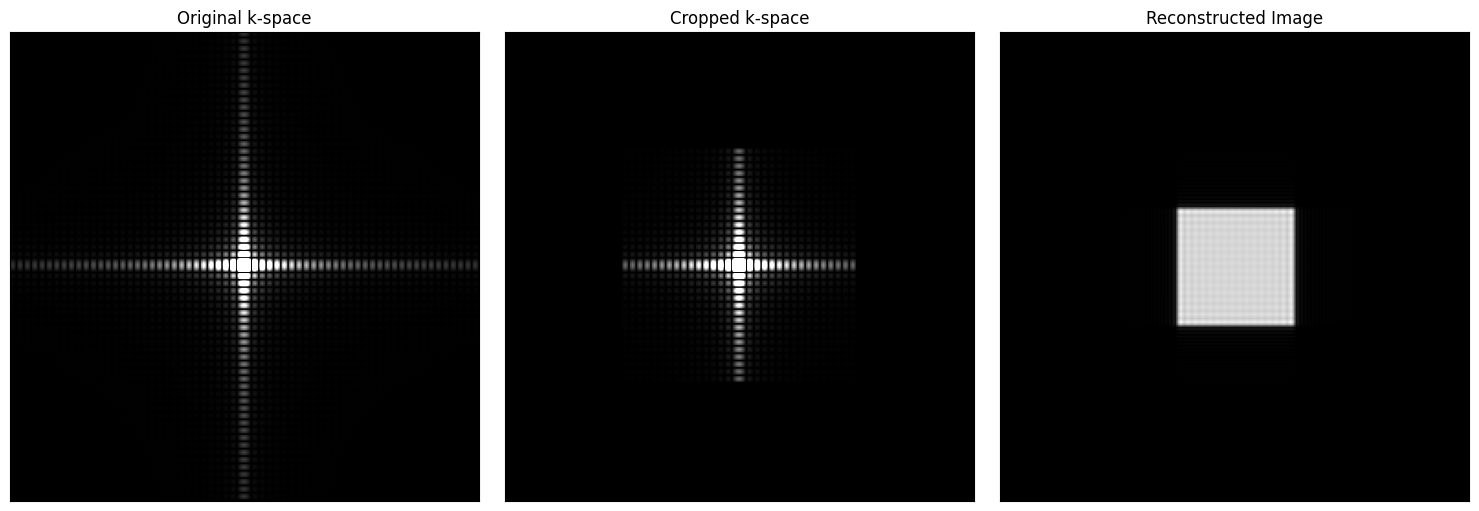

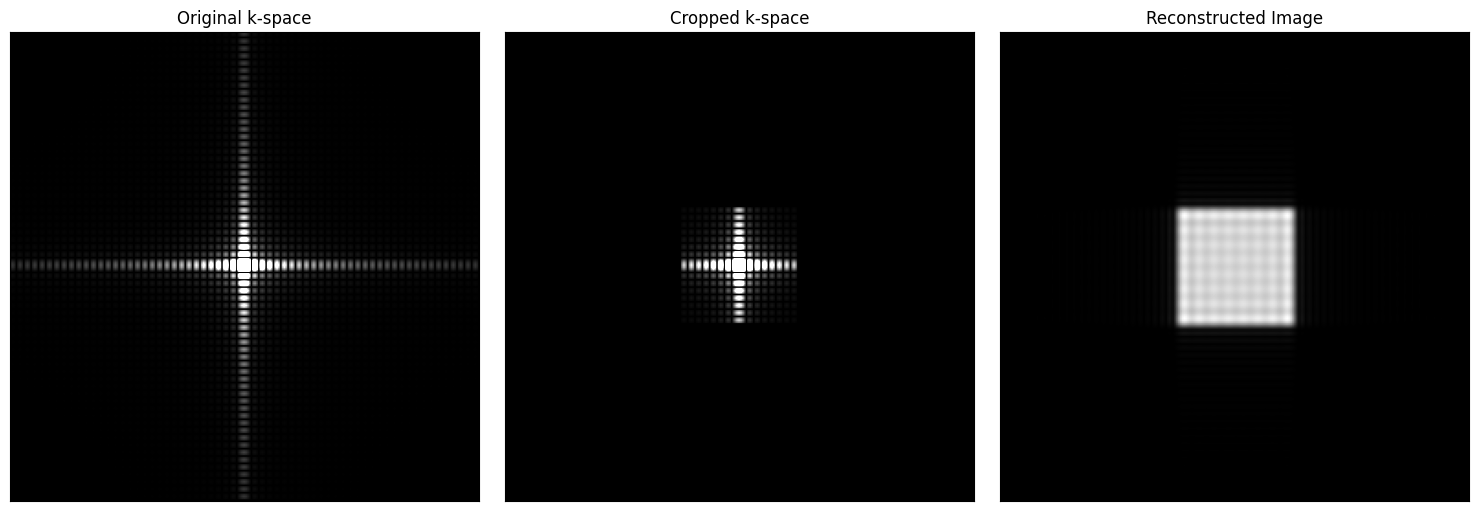

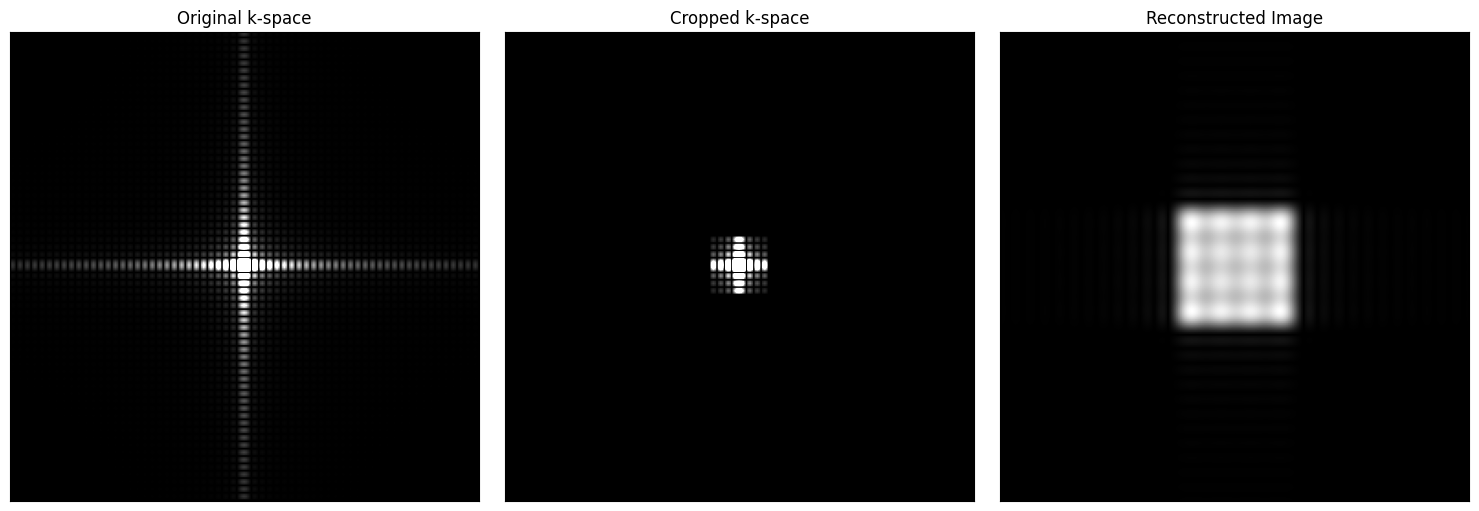

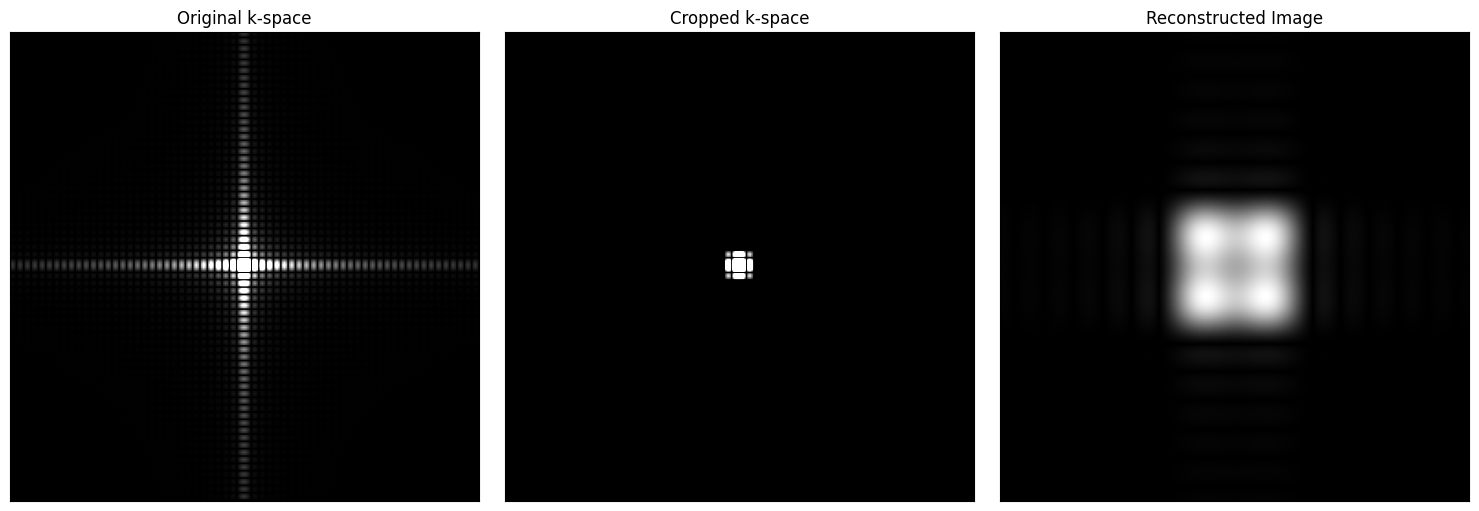

In [23]:
# generate a rectangular object
N = 256
kx = np.linspace(-N/2+1, N/2, N)/N
N_rect = N/4
kdata = np.sinc(kx * N_rect)[:, np.newaxis] * np.sinc(kx * N_rect)

for crop_fraction in [2, 4, 8, 16]:
    # crop the k-space data to simulate a change in spatial resolution
    kdata_cropped = kdata.copy()
    # compute the size of the central region to crop
    crop_size = N // crop_fraction

    # compute the indices for cropping the central region
    start_idx = N // 2 - crop_size // 2
    end_idx = start_idx + crop_size

    # crop the central region of k-space data
    kdata_cropped = np.zeros_like(kdata)
    kdata_cropped[start_idx:end_idx, start_idx:end_idx] = kdata[start_idx:end_idx, start_idx:end_idx]

    # compute the inverse Fourier Transform
    rect_recon_cropped = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(kdata_cropped)))

    # display the resulting image and k-space data
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(np.abs(kdata), cmap='gray', vmax=.05)
    axs[0].set_title('Original k-space')
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    axs[1].imshow(np.abs(kdata_cropped), cmap='gray', vmax=.05)
    axs[1].set_title('Cropped k-space')
    axs[1].set_xticks([])
    axs[1].set_yticks([])

    axs[2].imshow(np.abs(rect_recon_cropped), cmap='gray')
    axs[2].set_title('Reconstructed Image')
    axs[2].set_xticks([])
    axs[2].set_yticks([])

    plt.tight_layout()
    plt.show()
